In [2]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import trapz
from scipy.stats import norm, beta
from scipy.stats.mstats import mquantiles

# Laplace Noise Unidimensional

In [3]:
alphas = [1.0, 2.0, 5.0, 10.0, 50.0]
ndatas = [50, 200, 500, 1000]
# ndatas = [100, 1000]
algos = ["slice", "neal2", "neal2m5"]
nrep = 48

In [4]:
alphas

[1.0, 2.0, 5.0, 10.0, 50.0]

In [5]:
density_fname = "./unidimensional_laplace/dens/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_eval_dens.csv"

In [6]:
grid = np.linspace(-10, 10, 1000)
true_dens = 1/3 * norm.pdf(grid, loc=-5) + \
    1/3 * norm.pdf(grid, loc=0) + \
    1/3 * norm.pdf(grid, loc=5)

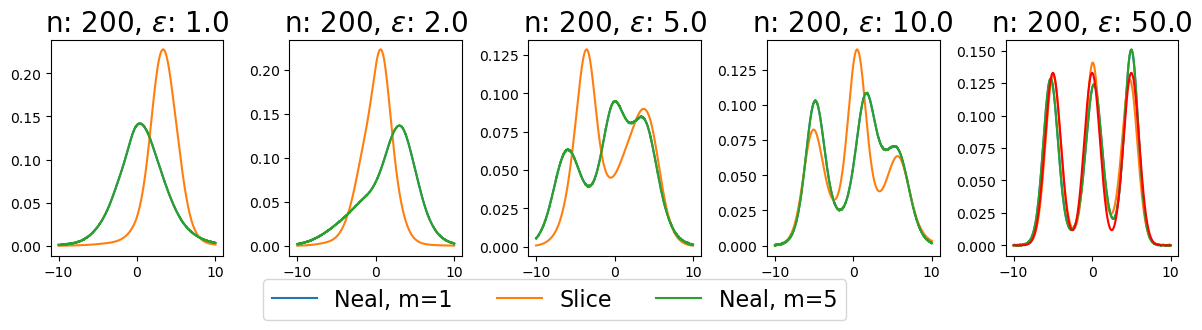

In [11]:
fig, axis = plt.subplots(nrows=1, ncols=len(alphas), figsize=(12, 3))

n = 200
for m, a in enumerate(alphas):
    neal_dens = pd.read_csv(density_fname.format("neal2", n, a, 0)).values
    neal5m_dens = pd.read_csv(density_fname.format("neal2m5", n, a, 0)).values
    slice_dens = pd.read_csv(density_fname.format("slice", n, a, 0)).values
    neal5m_dens = np.exp(neal_dens) + np.random.normal(0, 0.05, neal_dens.shape)
    neal_dens = np.mean(np.exp(neal_dens), axis=0)
    neal5m_dens = np.mean(neal5m_dens, axis=0)
    axis[m].plot(grid, neal_dens, label="Neal, m=1")
    axis[m].plot(grid, np.mean(np.exp(slice_dens), axis=0), label="Slice")
    axis[m].plot(grid, neal5m_dens, label="Neal, m=5")
    
    if m == 4:
        axis[m].plot(grid, true_dens, color="red", label="True")
        
    axis[m].set_title(r"n: {0}, $\varepsilon$: {1}".format(n, a), fontsize=20)

plt.tight_layout()
# plt.legend()

axis[2].legend(ncol=4, fontsize=16, bbox_to_anchor=(-1.6, -0.35), loc="lower left")

plt.savefig("unidimensional_laplace/new_plots/dens_estimate_n200.pdf", bbox_inches="tight")
plt.show()

n: 50, a: 1.0, neal: 4999, slice: 4999
n: 50, a: 2.0, neal: 4999, slice: 4999
n: 50, a: 5.0, neal: 4999, slice: 4999
n: 50, a: 10.0, neal: 4999, slice: 4999
n: 50, a: 50.0, neal: 4999, slice: 4999
n: 200, a: 1.0, neal: 49999, slice: 4999
n: 200, a: 2.0, neal: 49999, slice: 4999
n: 200, a: 5.0, neal: 49999, slice: 4999
n: 200, a: 10.0, neal: 49999, slice: 4999
n: 200, a: 50.0, neal: 49999, slice: 4999
n: 500, a: 1.0, neal: 4999, slice: 4999
n: 500, a: 2.0, neal: 4999, slice: 4999
n: 500, a: 5.0, neal: 4999, slice: 4999
n: 500, a: 10.0, neal: 4999, slice: 4999
n: 500, a: 50.0, neal: 4999, slice: 4999
n: 1000, a: 1.0, neal: 4999, slice: 4999
n: 1000, a: 2.0, neal: 4999, slice: 4999
n: 1000, a: 5.0, neal: 4999, slice: 4999
n: 1000, a: 10.0, neal: 4999, slice: 4999
n: 1000, a: 50.0, neal: 4999, slice: 4999


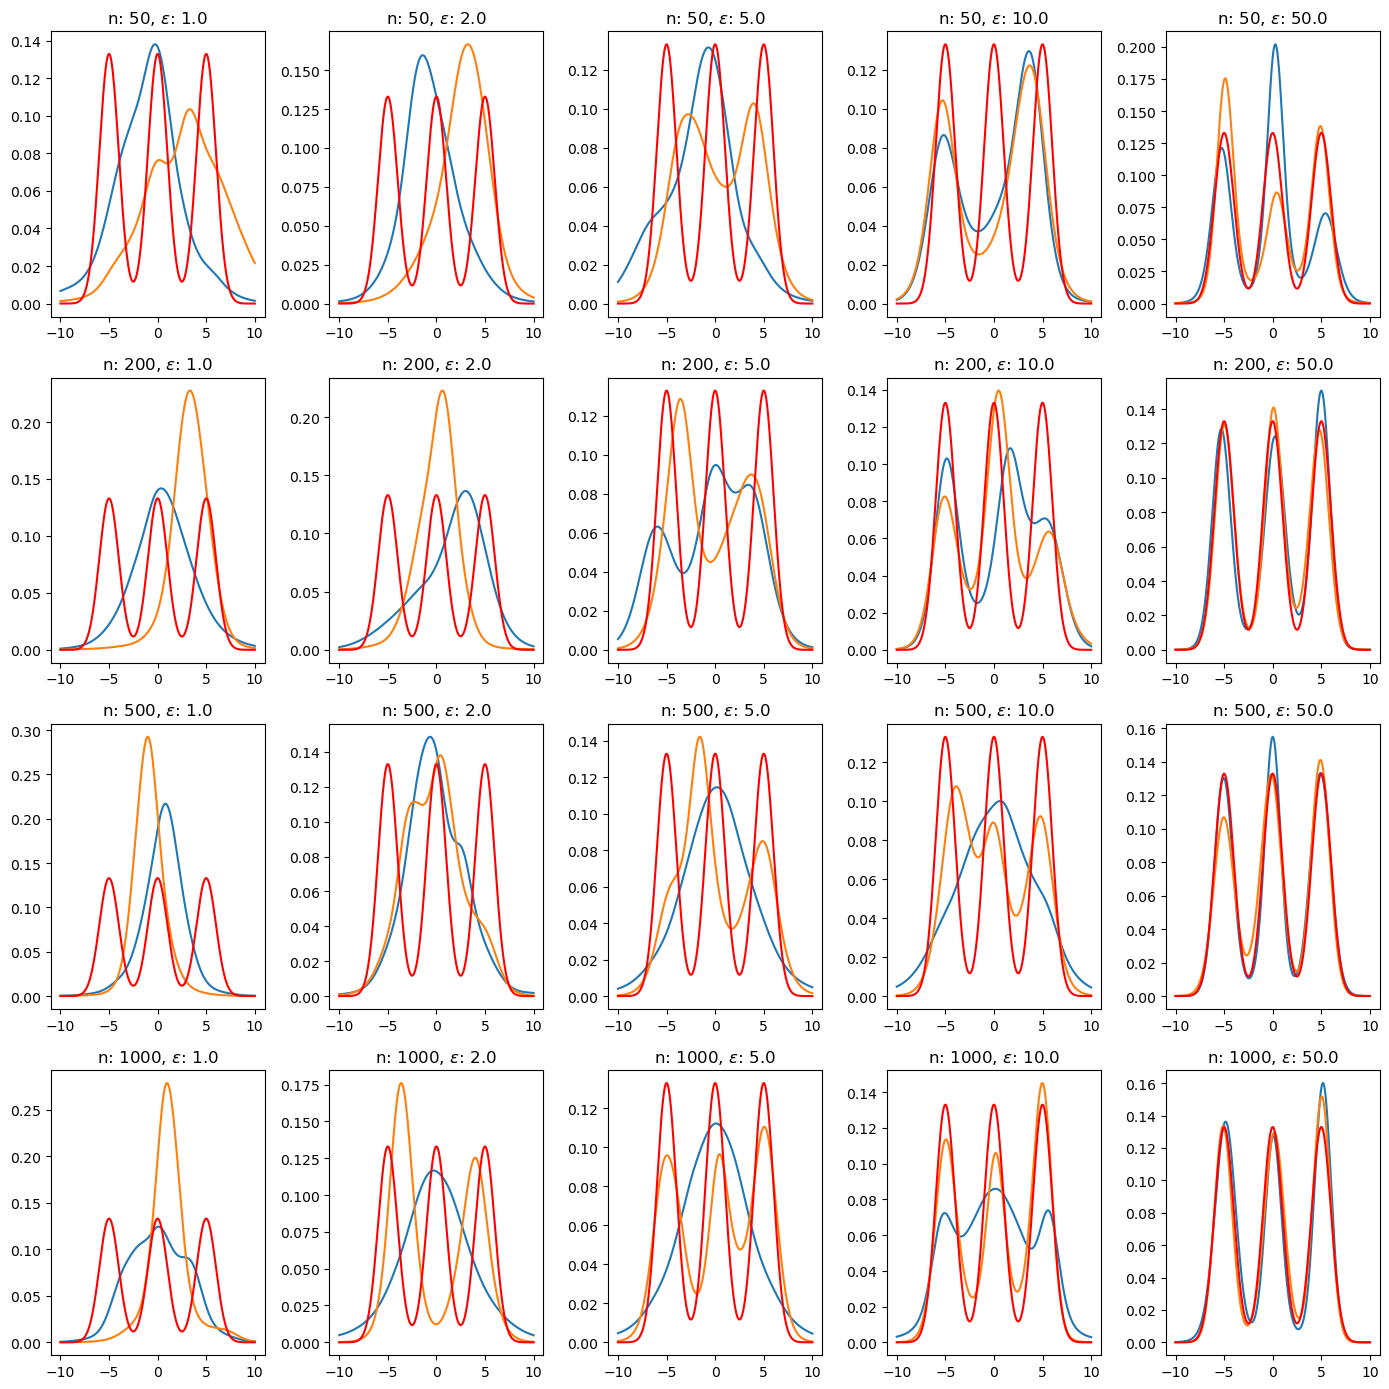

In [10]:
fig, axis = plt.subplots(nrows=len(ndatas), ncols=len(alphas), figsize=(14, 14))

for l, n in enumerate(ndatas):
    for m, a in enumerate(alphas):
        neal_dens = pd.read_csv(density_fname.format("neal2", n, a, 0))
        slice_dens = pd.read_csv(density_fname.format("slice", n, a, 0))
        # neal5m_dens = pd.read_csv(density_fname.format("neal2m5", n, a, 0)).values
        print("n: {0}, a: {1}, neal: {2}, slice: {3}".format(n, a, neal_dens.shape[0], slice_dens.shape[0]))
        axis[l, m].plot(grid, np.mean(np.exp(neal_dens), axis=0), label="Neal")
        axis[l, m].plot(grid, np.mean(np.exp(slice_dens), axis=0), label="Slice")
        # axis[l, m].plot(grid, np.mean(np.exp(neal5m_dens), axis=0), label="Neal, m=5")
        axis[l, m].plot(grid, true_dens, color="red")
        axis[l, m].set_title(r"n: {0}, $\varepsilon$: {1}".format(n, a))
        
plt.tight_layout()
# plt.legend()
# plt.savefig("unidimensional_laplace/new_plots/dens_estimate.pdf", bbox_inches="tight")
plt.show()

In [ ]:
density_fname = "./unidimensional_laplace/out/ndata_{0}_eps_{1:.6f}_rep_{2}_eval_dens.csv"

grid = np.linspace(-15, 15, 1000)
true_dens = 1/3 * norm.pdf(grid, loc=-5) + \
    1/3 * norm.pdf(grid, loc=0) + \
    1/3 * norm.pdf(grid, loc=5)

hell_dists_means = []
hell_dists_sds = []

for eps in epsilons:
    print("eps: {0}".format(eps))
    errors = np.zeros(100)
    for i in range(100):
        try:
            dens = pd.read_csv(density_fname.format(250, eps, i), header=None).values
        except:
            continue
            
        mean_dens = np.mean(np.exp(dens), axis=0)
        errors[i] = trapz((np.sqrt(mean_dens) - np.sqrt(true_dens))**2, grid)
    hell_dists_means.append(np.mean(errors))
    hell_dists_sds.append(np.std(errors))

In [ ]:
hell_dists_means = np.array(hell_dists_means)
hell_dists_sds = np.array(hell_dists_sds)

In [ ]:
plt.plot(epsilons, hell_dists_means)
plt.fill_between(epsilons, hell_dists_means - hell_dists_sds, 
                 hell_dists_means + hell_dists_sds, alpha=0.3)
# plt.savefig("unidimensional_laplace/plots/hell_dists.pdf", bbox_inches="tight")

# Acceptance Rates

In [36]:
arate_fname = "./unidimensional_laplace/out/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_acceptance_rate.csv"

slice_arate = np.zeros((len(ndatas), len(alphas)))
slice_low = np.zeros((len(ndatas), len(alphas)))
slice_up = np.zeros((len(ndatas), len(alphas)))


neal_arate = np.zeros((len(ndatas), len(alphas)))
neal_low = np.zeros((len(ndatas), len(alphas)))
neal_up = np.zeros((len(ndatas), len(alphas)))

neal5m_arate = np.zeros((len(ndatas), len(alphas)))
neal5m_low = np.zeros((len(ndatas), len(alphas)))
neal5m_up = np.zeros((len(ndatas), len(alphas)))


for l, n in enumerate(ndatas):
    for m, a in enumerate(alphas):
        curr_slice = []
        curr_neal = []
        curr_neal5m = []
        
        for i in range(nrep):
            curr_slice.append(
                pd.read_csv(arate_fname.format("slice", n, a, i), header=None).values[0, 0]) 
            curr_neal.append(
                pd.read_csv(arate_fname.format("neal2", n, a, i), header=None).values[0, 0]) 
            
            curr_neal5m.append(
                pd.read_csv(arate_fname.format("neal2m5", n, a, i), header=None).values[0, 0]) 
            
        slice_arate[l, m] = np.mean(curr_slice)
        slice_low[l, m], slice_up[l, m] = mquantiles(curr_slice, prob=[0.5, 0.95])
        
        neal_arate[l, m] = np.mean(curr_neal)
        neal_low[l, m], neal_up[l, m] = mquantiles(curr_neal, prob=[0.5, 0.95])
        
        neal5m_arate[l, m] = np.mean(curr_neal5m)
        neal5m_low[l, m], neal_up[l, m] = mquantiles(curr_neal5m, prob=[0.5, 0.95])

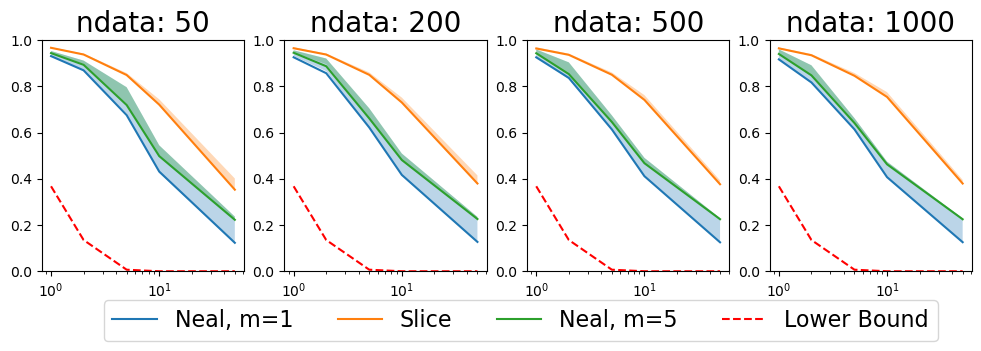

In [45]:
fig, axis = plt.subplots(nrows=1, ncols=len(ndatas), figsize=(12, 3))

for i in range(len(ndatas)):
    axis[i].plot(alphas, neal_arate[i, :], label="Neal, m=1")
    axis[i].fill_between(alphas, neal_low[i, :], neal_up[i, :], alpha=0.3)
    
    axis[i].plot(alphas, slice_arate[i, :], label="Slice")
    axis[i].fill_between(alphas, slice_low[i, :], slice_up[i, :], alpha=0.3)
    
    axis[i].plot(alphas, neal5m_arate[i, :], label="Neal, m=5")
    axis[i].fill_between(alphas, neal5m_low[i, :], neal_up[i, :], alpha=0.3)
    
    axis[i].plot(alphas, np.exp(-np.array(alphas)), "--", color="red", label="Lower Bound")
    axis[i].set_ylim(0, 1)
    axis[i].set_xticks(alphas)
    axis[i].set_xscale("log")
    axis[i].set_title("ndata: {0}".format(ndatas[i]), fontsize=20)
    
    
axis[2].legend(fontsize=(16), ncol=4, loc="lower left", bbox_to_anchor=(-2.15, -0.35))
plt.savefig("unidimensional_laplace/new_plots/acceptance_rates.pdf", bbox_inches="tight")

# Effective Sample Sizes

In [50]:
def get_ess(base_fname):
    out_neal = np.zeros((len(ndatas), len(alphas)))    
    out_slice = np.zeros((len(ndatas), len(alphas)))
    out_neal5m = np.zeros((len(ndatas), len(alphas)))
    
    
    
    for l, n in enumerate(ndatas):
        for m, a in enumerate(alphas):
            curr_slice = []
            curr_neal = []
            curr_neal5m = []
            
            for i in range(nrep):
                chain = pd.read_csv(base_fname.format("neal2", n, a, i), header=None).values[:, 0]
                curr_neal.append(az.ess(chain))
                
                chain = pd.read_csv(base_fname.format("slice", n, a, i), header=None).values[:, 0]
                curr_slice.append(az.ess(chain))
                
                chain = pd.read_csv(base_fname.format("neal2m5", n, a, i), header=None).values[:, 0]
                curr_neal5m.append(az.ess(chain))
                
            # print("eps: ", eps, "curr: ", curr)    
            out_neal[l, m] = np.median(curr_neal)
            out_slice[l, m] = np.median(curr_slice)
            out_neal5m[l, m] = np.median(curr_neal5m)
            
            
    return out_neal, out_slice, out_neal5m

In [51]:
nclus_fname = "./unidimensional_laplace/out/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_nclus_chain.csv"
nclus_ess_neal, nclus_ess_slice, nclus_ess_neal5m = get_ess(nclus_fname)

In [ ]:
neal_times = np.zeros((len(ndatas), len(alphas)))
slice_times = np.zeros((len(ndatas), len(alphas)))
time_fname = "./unidimensional_laplace/out/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_time.csv"

for l, n in enumerate(ndatas):
    for m, eps in enumerate(alphas):
        curr_slice = []
        curr_neal = []
        for i in range(nrep):
            t = pd.read_csv(time_fname.format("neal2", n, a, i), header=None).values[:, 0]
            print(i, t[0])
            curr_neal.append(t)

            t = pd.read_csv(time_fname.format("slice", n, a, i), header=None).values[:, 0]
            curr_slice.append(t)

        # print("eps: ", eps, "curr: ", curr)    
        neal_times[l, m] = np.median(curr_neal) / 1000
        slice_times[l, m] = np.median(curr_slice) / 1000
        #time = pd.read_csv(time_fname.format("neal2", n, eps), header=None).values[0]
        #neal_times[l, m] = time / 1000
        
        #time = pd.read_csv(time_fname.format("blockedgibbs", n, eps), header=None).values[0]
        # slice_times[l, m] = time / 1000

In [ ]:
neal_times

In [ ]:
slice_times

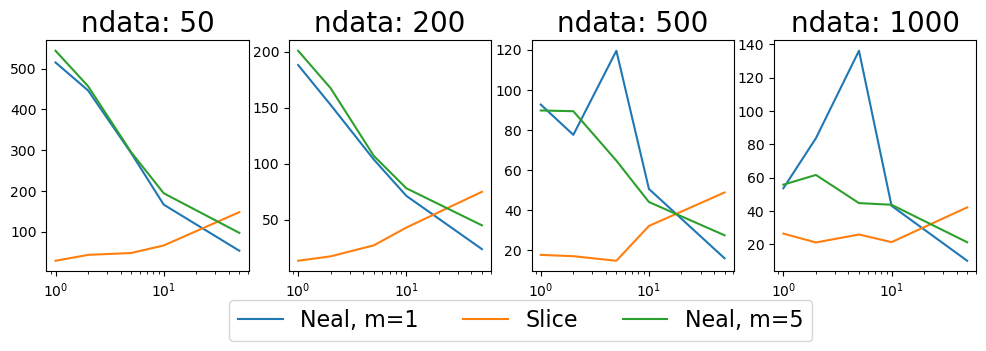

In [56]:
fig, axis = plt.subplots(nrows=1, ncols=len(ndatas), figsize=(12, 3))

for i in range(len(ndatas)):
    axis[i].plot(alphas, nclus_ess_neal[i, :], label="Neal, m=1")
    axis[i].plot(alphas, nclus_ess_slice[i, :], label="Slice")
    axis[i].plot(alphas, nclus_ess_neal5m[i, :], label="Neal, m=5")
    axis[i].set_title("ndata: {0}".format(ndatas[i]), fontsize=20)
    axis[i].set_xticks(alphas)
    axis[i].set_xscale("log")
    
axis[2].legend(fontsize=(16), ncol=3, loc="lower left", bbox_to_anchor=(-1.55, -0.35))
plt.savefig("unidimensional_laplace/new_plots/nclus_ess.pdf", bbox_inches="tight")

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=len(ndatas), figsize=(12, 5))

for i in range(len(ndatas)):
    axis[i].plot(alphas, nclus_ess_neal[i, :] / neal_times[i, :], label="Neal")
    axis[i].plot(alphas, nclus_ess_slice[i, :] / slice_times[i, :], label="Slice")
    axis[i].set_title("ndata: {0}".format(ndatas[i]), fontsize=20)
    axis[i].set_xticks(alphas)
    axis[i].set_xscale("log")
    
axis[1].legend(fontsize=(16))
plt.savefig("unidimensional_laplace/new_plots/nclus_ess_time.pdf", bbox_inches="tight")

In [ ]:
fig, axis = plt.subplots(nrows=len(ndatas), ncols=len(alphas), figsize=(15, 18))

for l, n in enumerate(ndatas):
    for m, a in enumerate(alphas):
        neal_nclus = pd.read_csv(nclus_fname.format("neal2", n, a, 0)).values
        nc, w = np.unique(neal_nclus, return_counts=True)
        axis[l, m].bar(nc, w / w.sum(), label="Neal", alpha=0.5)
        
        slice_nclus = pd.read_csv(nclus_fname.format("slice", n, a, 0)).values
        nc, w = np.unique(slice_nclus, return_counts=True)
        axis[l, m].bar(nc, w / w.sum(), label="Slice", alpha=0.5)

        axis[l, m].set_title(r"n: {0}, $\varepsilon$: {1}".format(n, a), fontsize=16)
# plt.legend()
plt.tight_layout()
plt.savefig("unidimensional_laplace/new_plots/nclus_hist.pdf", bbox_inches="tight")
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score as ari

fig, axis = plt.subplots(1, ncols=len(ndatas), figsize=(12, 3))

bestclus_fname = "./unidimensional_laplace/out/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_best_clus.csv"
trueclus_fname = "./unidimensional_laplace/out/ndata_{0}_rep_{1}trueclus.csv"

for l, n in enumerate(ndatas):
    neal_aris = np.zeros((len(alphas), nrep))
    slice_aris = np.zeros((len(alphas), nrep))
    for m, a in enumerate(alphas):
        curr_slice = []
        curr_neal = []
        for i in range(nrep):
            true_clus = pd.read_csv(trueclus_fname.format(n, i)).values[:, 0]
            neal_bestclus = pd.read_csv(bestclus_fname.format("neal2", n, a, i)).values[:, 0]
            slice_bestclus = pd.read_csv(bestclus_fname.format("slice", n, a, i)).values[:, 0]
            neal_aris[m, i] = ari(true_clus, neal_bestclus)
            slice_aris[m, i] = ari(true_clus, slice_bestclus)
    
    axis[l].plot(alphas, np.median(neal_aris, axis=1), label="Neal")
    axis[l].plot(alphas, np.median(slice_aris, axis=1), label="Slice")
    axis[l].set_title("ndata: {0}".format(n), fontsize=20)

axis[1].legend(fontsize=(16), ncol=2, loc="lower left", bbox_to_anchor=(0.3, -0.35))
# plt.tight_layout()
plt.savefig("unidimensional_laplace/new_plots/ari.pdf", bbox_inches="tight")
plt.show()

In [ ]:
plt.plot(epsilons, nclus_ess_means)
plt.fill_between(epsilons, nclus_ess_means - nclus_ess_sds, 
                 nclus_ess_means + nclus_ess_sds, alpha=0.3)
#plt.savefig("unidimensional_laplace/plots/nclus_ess.pdf", bbox_inches="tight")

In [ ]:
entropy_fname = "./unidimensional_laplace/out/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_entropy_chain.csv"

entropy_neal, entropy_slice = get_ess(entropy_fname)

In [ ]:
plt.plot(alphas, entropy_ess_means)
plt.fill_between(epsilons, entropy_ess_means - entropy_ess_sds, 
                 entropy_ess_means + entropy_ess_sds, alpha=0.3)
# plt.savefig("unidimensional_laplace/plots/entropy_ess.pdf", bbox_inches="tight")

In [ ]:
loglik_fname = "./unidimensional_laplace/out/{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_loglik_chain.csv"
loglik_neal, loglik_slice = get_ess(loglik_fname)

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=len(ndatas), figsize=(12, 5))

for i in range(len(ndatas)):
    axis[i].plot(alphas, loglik_neal[i, :], label="Neal")
    axis[i].plot(alphas, loglik_slice[i, :], label="Slice")
    axis[i].set_title("ndata: {0}".format(ndatas[i]), fontsize=20)
    axis[i].set_xticks(alphas)
    axis[i].set_xscale("log")
    axis[i].set_yscale("log")
    
axis[1].legend(fontsize=(16))
plt.savefig("unidimensional_laplace/new_plots/loglik_ess.pdf", bbox_inches="tight")

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=len(ndatas), figsize=(12, 5))

for i in range(len(ndatas)):
    axis[i].plot(alphas, loglik_neal[i, :] / neal_times[i, :], label="Neal")
    axis[i].plot(alphas, loglik_slice[i, :]/ slice_times[i, :], label="Slice")
    axis[i].set_title("ndata: {0}".format(ndatas[i]), fontsize=20)
    axis[i].set_xticks(alphas)
    axis[i].set_xscale("log")
    
axis[1].legend(fontsize=(16))
plt.savefig("unidimensional_laplace/new_plots/loglik_time_ess.pdf", bbox_inches="tight")

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flat

chain = pd.read_csv(loglik_fname.format(250, 2.0, 1), header=None).values[:, 0]
ess = az.ess(chain)
axes[0].plot(chain)
axes[0].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(2, 1, ess))

chain = pd.read_csv(loglik_fname.format(250, 2.0, 39), header=None).values[:, 0]
ess = az.ess(chain)
axes[1].plot(chain)
axes[1].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(2, 39, ess))

chain = pd.read_csv(loglik_fname.format(250, 0.1, 1), header=None).values[:, 0]
ess = az.ess(chain)
axes[2].plot(chain)
axes[2].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(0.1, 1, ess))

chain = pd.read_csv(loglik_fname.format(250, 0.1, 39), header=None).values[:, 0]
ess = az.ess(chain)
axes[3].plot(chain)
axes[3].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(0.1, 39, ess))

plt.savefig("unidimensional_laplace/plots/loglik_chains.pdf", bbox_inches="tight")

In [ ]:
plt.plot(epsilons, loglik_ess_means)
plt.fill_between(epsilons, loglik_ess_means - loglik_ess_sds, 
                 loglik_ess_means + loglik_ess_sds, alpha=0.3)
plt.savefig("unidimensional_laplace/plots/loglik_ess.pdf", bbox_inches="tight")

In [ ]:
l2err_fname = "./unidimensional_laplace/out/ndata_{0}_eps_{1:.6f}_rep_{2}_l2error_chain.csv"

l2_err_means = []
l2_err_sds = []

for eps in epsilons:
    curr = []
    for i in range(100):
        try:
            chain = pd.read_csv(l2err_fname.format(250, eps, i), header=None).values[:, 0]
        except:
            continue

        curr.append(np.mean(chain))
    
    l2_err_means.append(np.mean(curr))
    l2_err_sds.append(np.std(curr))
    
l2_err_means = np.array(l2_err_means)
l2_err_sds = np.array(l2_err_sds)

In [ ]:
l2_err_means

In [ ]:
plt.plot(epsilons, l2_err_means)
plt.fill_between(epsilons, l2_err_means - l2_err_sds, 
                 l2_err_means + l2_err_sds, alpha=0.3)

plt.savefig("unidimensional_laplace/plots/l2_errs.pdf", bbox_inches="tight")

In [ ]:
l2err_fname = "./unidimensional_laplace/out/ndata_{0}_eps_{1:.6f}_rep_{2}_l2error_chain.csv"

l2err_ess_means, l2err_ess_sds = get_ess(l2err_fname)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flat

chain = pd.read_csv(l2err_fname.format(250, 1.0, 1), header=None).values[:, 0]
ess = az.ess(chain)
axes[0].plot(chain)
axes[0].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(1, 75, ess))

chain = pd.read_csv(l2err_fname.format(250, 1.0, 39), header=None).values[:, 0]
ess = az.ess(chain)
axes[1].plot(chain)
axes[1].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(1, 36, ess))

chain = pd.read_csv(l2err_fname.format(250, 0.1, 1), header=None).values[:, 0]
ess = az.ess(chain)
axes[2].plot(chain)
axes[2].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(0.1, 1, ess))

chain = pd.read_csv(l2err_fname.format(250, 0.1, 39), header=None).values[:, 0]
ess = az.ess(chain)
axes[3].plot(chain)
axes[3].set_title("eps: {0}, replica: {1}, ess: {2:.2f}".format(0.1, 39, ess))

plt.savefig("unidimensional_laplace/plots/l2err_chains.pdf", bbox_inches="tight")

In [ ]:
eps = 0.01
i = 30
curr = pd.read_csv(l2err_fname.format(250, eps, i), header=None).values[:, 0]
az.ess(curr)

In [ ]:
plt.plot(epsilons, l2err_ess_means)

In [ ]:
plt.plot(epsilons, l2err_ess_means)
plt.fill_between(epsilons, l2err_ess_means - l2err_ess_sds, 
                 l2err_ess_means + l2err_ess_sds, alpha=0.3)
plt.savefig("unidimensional_laplace/plots/l2err_ess.pdf", bbox_inches="tight")

In [ ]:
l2err_ess_means

# Wavelet

In [ ]:
grid = np.linspace(0.0, 1.0, 1000)
true_dens = 1/3 * (
    beta.pdf(grid, 5, 50) +
    beta.pdf(grid, 50, 50) +
    beta.pdf(grid, 50, 5)
)
plt.plot(grid, true_dens)

In [ ]:
JS = [2, 4, 6]
alphas = np.array([2.0, 10.0, 50.0, 100.0, 250.0])
nrep = 1

In [ ]:
base_wav_fname = "./wavelets/out/wavelet_j_{0}_ndata_{1}_alpha_{2:.6f}_rep_{3}_{4}.csv"
base_lap_fname = "./wavelets/out/laplace_ndata_{0}_alpha_{1:.6f}_rep_{2}_{3}.csv"

wav_arates = np.zeros((len(JS), len(alphas), nrep))
lap_arates = np.zeros((len(alphas), nrep))

for m, a in enumerate(alphas):
    for n in range(nrep):
        lap_arates[m, n] = np.loadtxt(base_lap_fname.format(250, a, n, "acceptance_rate"), delimiter=",")
        for l, j in enumerate(JS):
            curr_fname = base_wav_fname.format(j, 250, a, n, "acceptance_rate")
            wav_arates[l, m, n] = np.loadtxt(curr_fname, delimiter=",")

In [ ]:
colors = ["orange", "forestgreen", "red"]

plt.plot(alphas, np.median(lap_arates, axis=-1), label="Laplace")

for l, j in enumerate(JS):
    plt.plot(alphas, np.median(wav_arates[l, :, :], axis=-1), label="j: {0}".format(j), color=colors[l])

plt.plot(alphas, np.exp(-alphas), "--", color=colors[l])

plt.ylim(0, 1)
plt.xticks(alphas)
plt.xscale("log")

plt.legend(fontsize=14)
plt.savefig("./wavelets/plots/bgg_acceptance_rates.pdf", bbox_inches="tight")

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=len(alphas), figsize=(14, 6.5))

JS = [2, 4, 6]

for m, a in enumerate(alphas):
    for l, j in enumerate(JS):
        dens = pd.read_csv(base_wav_fname.format(j, 250, a, 0, "eval_dens"))        
        axis[0, m].plot(grid, np.mean(np.exp(dens), axis=0), label="j: {0}".format(j))
    
    axis[0, m].set_title(r"Wavelet, $\alpha$: {0}".format(a))
    axis[0, m].plot(grid, true_dens, color="red")
    
    dens = pd.read_csv(base_lap_fname.format(250, a, 0, "eval_dens")) 
    axis[1, m].plot(grid, np.mean(np.exp(dens), axis=0))
    axis[1, m].set_title(r"Laplace, $\alpha$: {0}".format(a))
    axis[1, m].plot(grid, true_dens, color="red")
        
#plt.tight_layout()
axis[0, 2].legend()
plt.savefig("wavelets/plots/dens_estimate.pdf", bbox_inches="tight")
plt.show()

In [ ]:
dens_fname = "./wavelets/out_bgg/ndata_{0}_eps_{1:.6f}_j_{2}_rep_{3}_eval_dens.csv"
l2err = np.zeros((len(JS), len(eps)))

for l, j in enumerate(JS):
    for m, e in enumerate(eps):
        curr_fname = l2err_fname.format(250, e, j, 0)
        l2err[l, m] = np.mean(np.loadtxt(curr_fname, delimiter=","))

In [ ]:
dens_fname = "./wavelets/out_bgg/ndata_{0}_eps_{1:.6f}_j_{2}_rep_{3}_eval_dens.csv"
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

for l, j in enumerate(JS):
    for e in eps:
        curr_fname = dens_fname.format(250, e, j, 0)
        dens =  pd.read_csv(curr_fname, header=None).values
        axis[l].plot(xgrid, np.mean(np.exp(dens), axis=0), label=r"$\sigma_j$: {0}".format(e))
        
    axis[l].plot(xgrid, true_dens, color="red")
    axis[l].set_title("J: {0}".format(j), fontsize=18) 

axis[1].legend(ncol=4, loc="lower center", fontsize=18, bbox_to_anchor=[0.3, -0.4])
  
plt.savefig("./wavelets/plots/bgg_dens.pdf", bbox_inches="tight")

# Gaussian

In [ ]:
alphas = sorted([50.0, 25.0, 10.0, 5.0])
deltas = sorted([0.25, 0.1, 0.01])
nrep = 48

grid = np.linspace(-10, 10, 1000)
true_dens = 1/3 * norm.pdf(grid, loc=-5) + \
    1/3 * norm.pdf(grid, loc=0) + \
    1/3 * norm.pdf(grid, loc=5)

In [ ]:
def get_sig(alpha, delta):
    return np.sqrt(2 * np.log(1.25 / delta)) * 20 / alpha


get_sig(1.0, 0.01) ** 2

In [ ]:
base_fname = "gaussian/out/{0}_ndata_250_alpha_{1:.6f}_delta_{2:.6f}_rep_{3}_{4}.csv"

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=len(alphas), figsize=(15, 3))

d = 0.1

for m, a in enumerate(alphas):
    neal2_dens = pd.read_csv(base_fname.format("neal2", a, d, 0, "eval_dens"))
    neal3_dens = pd.read_csv(base_fname.format("neal3", a, d, 0, "eval_dens"))
    privneal2_dens = pd.read_csv(base_fname.format("privateneal2", a, d, 0, "eval_dens"))

    axis[ m].plot(grid, np.mean(np.exp(neal2_dens), axis=0), label="Neal2")
    axis[m].plot(grid, np.mean(np.exp(neal3_dens), axis=0), label="Neal3")
    axis[m].plot(grid, np.mean(np.exp(privneal2_dens), axis=0), label="Private Neal")
    axis[m].plot(grid, true_dens, color="red", label="True")
    axis[m].set_title(r"$\delta$: {0}, $\varepsilon$: {1}".format(d, a), fontsize=18)

axis[1].legend(ncol=4, fontsize=16, loc="lower center",  bbox_to_anchor=(1.0, -0.4))
# plt.tight_layout()

plt.savefig("gaussian/plots/dens_estimate_delta0_1.pdf", bbox_inches="tight")
plt.show()

In [ ]:
fig, axis = plt.subplots(nrows=len(deltas), ncols=len(alphas), figsize=(15, 12))


for l, d in enumerate(deltas):
    for m, a in enumerate(alphas):
        neal2_dens = pd.read_csv(base_fname.format("neal2", a, d, 0, "eval_dens"))
        neal3_dens = pd.read_csv(base_fname.format("neal3", a, d, 0, "eval_dens"))
        privneal2_dens = pd.read_csv(base_fname.format("privateneal2", a, d, 0, "eval_dens"))
        
        axis[l, m].plot(grid, np.mean(np.exp(neal2_dens), axis=0), label="Neal2")
        axis[l, m].plot(grid, np.mean(np.exp(neal3_dens), axis=0), label="Neal3")
        axis[l, m].plot(grid, np.mean(np.exp(privneal2_dens), axis=0), label="Private Neal")
        axis[l, m].plot(grid, true_dens, color="red", label="True")
        axis[l, m].set_title(r"$\delta$: {0}, $\varepsilon$: {1}".format(d, a), fontsize=18)

axis[-1, 1].legend(ncol=4, fontsize=16, loc="lower center",  bbox_to_anchor=(1.0, -0.3))
# plt.tight_layout()

plt.savefig("gaussian/plots/dens_estimate.pdf", bbox_inches="tight")
plt.show()

In [ ]:
def get_nclus_ess(base_fname):
    out_neal2 = np.zeros((len(deltas), len(alphas), nrep))
    out_neal3 = np.zeros((len(deltas), len(alphas), nrep))
    out_privneal = np.zeros((len(deltas), len(alphas), nrep))

    for l, d in enumerate(deltas):
        for m, a in enumerate(alphas):
            for i in range(nrep):
            
                chain = pd.read_csv(
                    base_fname.format("neal2", a, d, i, "nclus_chain"), header=None).values[:, 0]
                out_neal2[l, m, i] = az.ess(chain)

                chain = pd.read_csv(
                    base_fname.format("neal3", a, d, i, "nclus_chain"), header=None).values[:, 0]
                out_neal3[l, m, i] = az.ess(chain)

                chain = pd.read_csv(
                    base_fname.format("privateneal2", a, d, i, "nclus_chain"), header=None).values[:, 0]
                out_privneal[l, m, i] = az.ess(chain)
    
    out_neal2 = np.mean(out_neal2, axis=-1)
    out_neal3 = np.mean(out_neal3, axis=-1)
    out_privneal = np.mean(out_privneal, axis=-1)
    
    return out_neal2, out_neal3, out_privneal

In [ ]:
neal2_ess, neal3_ess, privneal_ess = get_nclus_ess(base_fname)

fig, axis = plt.subplots(nrows=1, ncols=len(deltas), figsize=(12, 3))

for i in range(len(deltas)):
    axis[i].plot(alphas, neal2_ess[i, :], label="Neal2")
    axis[i].plot(alphas, neal3_ess[i, :], label="Neal3")
    axis[i].plot(alphas, privneal_ess[i, :], label="Private Neal")
    axis[i].set_title(r"$\delta$: {0}".format(deltas[i]), fontsize=20)
    axis[i].set_xticks(alphas)
    axis[i].set_xscale("log")
    
axis[1].legend(fontsize=(16), ncol=3, bbox_to_anchor=(1.4, -0.07))
plt.savefig("gaussian/plots/nclus_ess.pdf", bbox_inches="tight")

# Global

In [ ]:
grid = np.linspace(0.0, 1.0, 1000)
true_dens = 1/3 * (
    beta.pdf(grid, 5, 50) +
    beta.pdf(grid, 50, 50) +
    beta.pdf(grid, 50, 5)
)
plt.plot(grid, true_dens)

In [ ]:
alphas = np.array([2.0, 10.0, 50.0, 100.0, 250.0])
nrep = 1

base_marg_fname = "./global/out/_neal2_histogram_ndata_{0}_alpha_{1:.6f}_rep_{2}_{3}.csv"
base_cond_fname = "./global/out/_slice_histogram_ndata_{0}_alpha_{1:.6f}_rep_{2}_{3}.csv"

In [ ]:
hist_arates = np.zeros((len(alphas), nrep))

for m, a in enumerate(alphas):
    for n in range(nrep):
        hist_arates[m, n] = np.loadtxt(base_hist_fname.format(250, a, n, "acceptance_rate"), delimiter=",")

In [ ]:
colors = ["orange", "forestgreen", "red"]

plt.plot(alphas, np.median(hist_arates, axis=-1), label="Laplace")

plt.plot(alphas, np.exp(-alphas), "--")

plt.ylim(0, 1)
plt.xticks(alphas)
plt.xscale("log")

plt.legend(fontsize=14)
# plt.savefig("./wavelets/plots/bgg_acceptance_rates.pdf", bbox_inches="tight")

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=len(alphas), figsize=(14, 3))

for m, a in enumerate(alphas):
    dens = pd.read_csv(base_marg_fname.format(250, a, 0, "eval_dens")) 
    axis[m].plot(grid, np.mean(np.exp(dens), axis=0), label="Neal")
    dens = pd.read_csv(base_cond_fname.format(250, a, 0, "eval_dens")) 
    axis[m].plot(grid, np.mean(np.exp(dens), axis=0), label="Slice")
    axis[m].set_title(r"$\varepsilon$: {0}".format(a), fontsize=16)
    axis[m].plot(grid, true_dens, color="red", label="True")
        
#plt.tight_layout()
axis[2].legend(ncol=3, loc="lower left", bbox_to_anchor=(-0.6, -0.35), fontsize=15)
plt.savefig("global/plots/dens_estimate2_l2_smallparams.pdf", bbox_inches="tight")
plt.show()

In [ ]:
4700+5610+717+2200+3272+4730+2651

In [ ]:
logprobs = np.ones(10) * 1e-12
logprobs[0] = 1.0

probs = np.zeros_like(logprobs)
for k in range(len(logprobs)):
    probs[k] = 1 / np.sum(np.exp(logprobs - logprobs[k]))
print(probs)



In [ ]:
from scipy.special import softmax

softmax(logprobs)

In [ ]:
logprobs

In [ ]:
np.exp(logprobs) / np.sum(np.exp(logprobs))

In [ ]:
from bayesmixpy import run_mcmc

means = np.array([-5, 0, 5])
probas = np.array([1, 1, 1]) / 3
c = np.sort(np.random.choice(3, p=probas, size=200))
conf_data = np.random.normal(means[c])
public_data = conf_data + np.random.laplace(scale=20/10, size=200)

In [ ]:
plt.hist(public_data, bins=20, alpha=0.4)
plt.hist(conf_data, bins=20, alpha=0.4)

In [ ]:
dp = """
fixed_value {
    totalmass: 4.0
}
"""

g0 = """
fixed_values {
    mean: 0.0
    var_scaling: 0.05
    shape: 4.0
    scale: 4.0
}
"""

algo = """
algo_id: "Neal2"
rng_seed: 20201124
iterations: 2000
burnin: 1000
init_num_clusters: 3
"""

In [ ]:
eval_dens_weird, _, _, _, _ = run_mcmc(
    "NNIG", "DP", public_data, g0, dp, algo, grid,
    return_clusters=False, return_num_clusters=False,
    return_best_clus=False)

In [ ]:
n = 200
a = 10

fig = plt.figure()

neal_dens = pd.read_csv(density_fname.format("neal2", n, a, 0))
plt.plot(grid, np.mean(np.exp(neal_dens), axis=0), label="Neal")
plt.plot(grid, np.mean(np.exp(eval_dens_weird), axis=0), label="No Privacy", color="forestgreen")
plt.plot(grid, true_dens, color="red", label="True")
plt.title(r"n: {0}, $\varepsilon$: {1}".format(n, a), fontsize=20)
plt.legend(fontsize=(16), ncol=3, loc="lower left", bbox_to_anchor=(-.03, -0.25))

plt.savefig("unidimensional_laplace/new_plots/example_no_privacy.pdf", bbox_inches="tight")